In [2]:
!pip install highlight_text


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\dqthi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import squarify
import matplotlib.pyplot as plt 
from pypalettes import load_cmap
import pandas as pd
from highlight_text import fig_text

In [4]:
url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/simple-treemap.csv"

df = pd.read_csv(url)

In [5]:
df

,type,name,value,parent
0,leaf,Mark,90,Team Dataviz
1,leaf,Robert,12,Team Dataviz
2,leaf,Emily,34,Team Dataviz
3,leaf,Marion,53,Team Dataviz
4,leaf,Nicolas,98,Team DevOps
5,leaf,Malki,22,Team DevOps
6,leaf,Djé,12,Team DevOps
7,leaf,Mélanie,45,Team Sales
8,leaf,Einstein,76,Team Sales


In [13]:
plt.rcParams['figure.dpi'] = 100

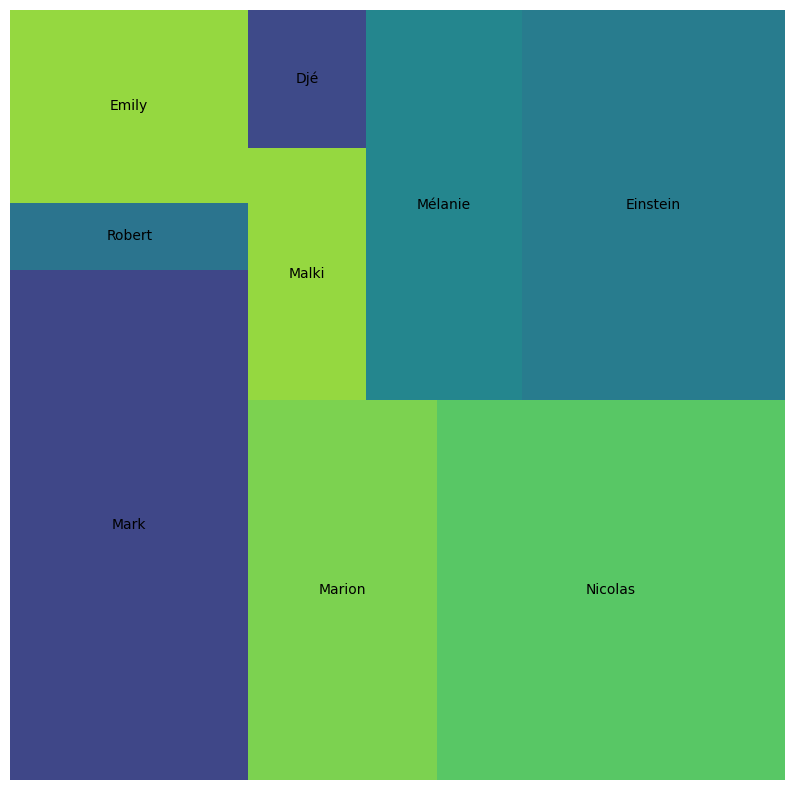

In [14]:
# create a figure 
fig, ax = plt.subplots(figsize=(10,10))
ax.set_axis_off()

# add treemap 
squarify.plot(
    sizes=df['value'],
    label=df['name'],
    ax = ax 
)

plt.show()

In [ ]:
# create a figure 
fig, ax = plt.subplots(figsize=(10,10))
ax.set_axis_off()

# add treemap 
squarify.plot(
    sizes=df['value'],
    label=df['name'],
    ax = ax 
)

plt.show()

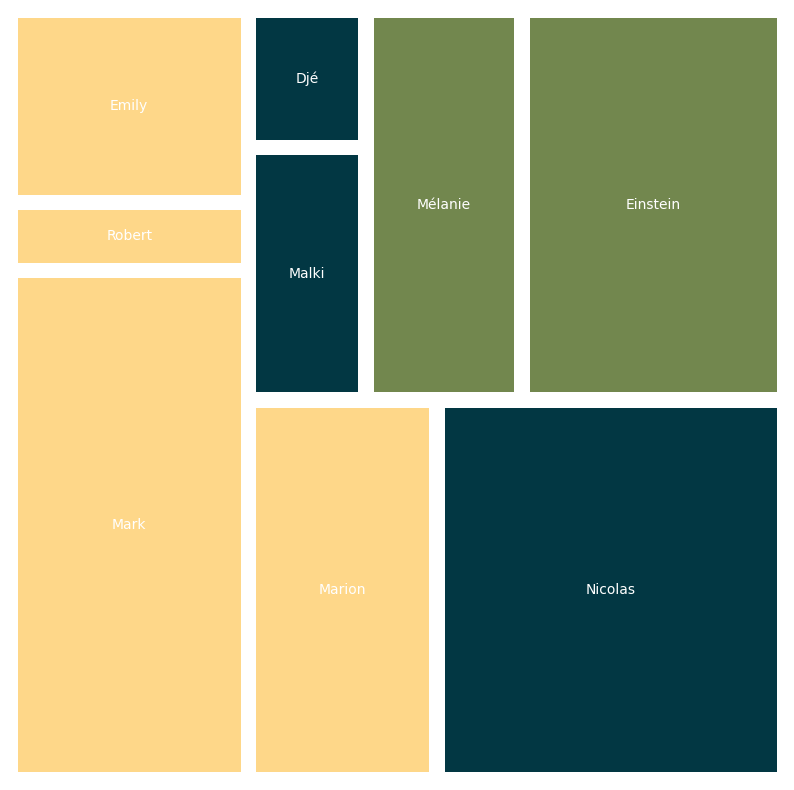

In [16]:
# create a color palette
cmap = load_cmap('Acadia')
category_codes, unique_categories = pd.factorize(df['parent'])
colors = [cmap(code) for code in category_codes]

# create a figure 
fig, ax = plt.subplots(figsize=(10,10))
ax.set_axis_off()

# add treemap 
squarify.plot(
    sizes=df['value'],
    label=df['name'],
    color= colors, 
    text_kwargs={'color':'white'},
    pad=True,
    ax = ax 
)

plt.show()

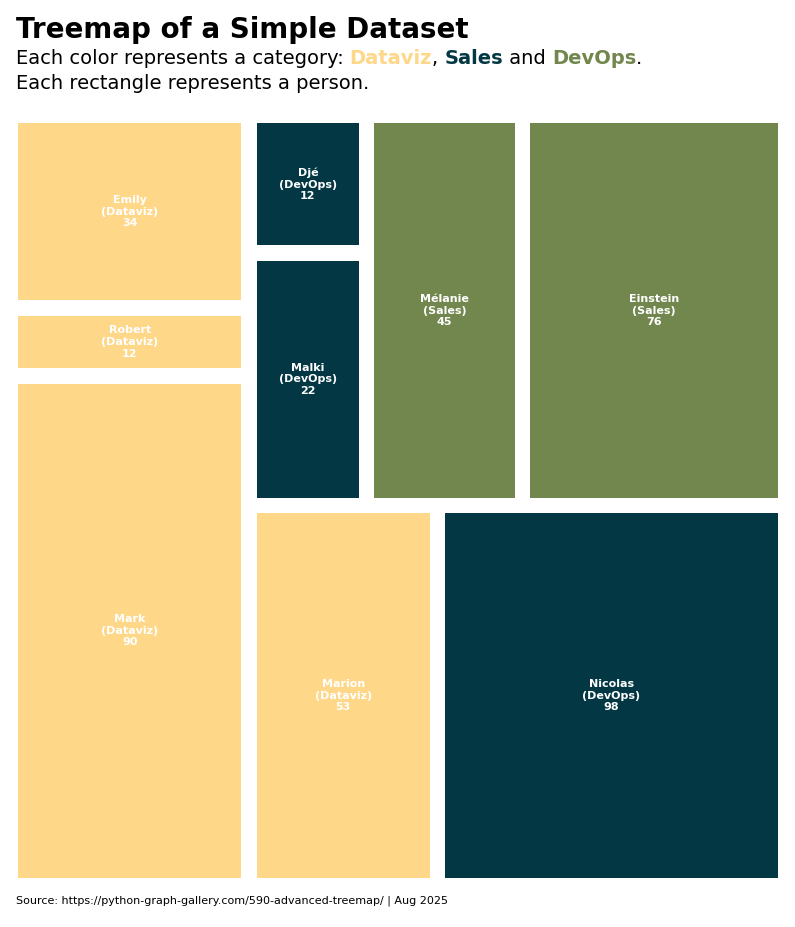

In [26]:
# create a color palette
cmap = load_cmap('Acadia')
category_codes, unique_categories = pd.factorize(df['parent'])
colors = [cmap(code) for code in category_codes]

# customize the lables 
labels = [f'{name}\n({parent[5:]})\n{value}' for name, value, parent in zip(df['name'], df['value'], df['parent'])]
# create a figure 
fig, ax = plt.subplots(figsize=(10,10))
ax.set_axis_off()

# add treemap 
squarify.plot(
    sizes=df['value'],
    label=labels,
    color= colors, 
    text_kwargs={'color':'white',
                 'fontsize':8,
                 'fontweight':'bold'},
    pad=True,
    ax = ax 
)

# add a title and legend:   
title = """<Treemap of a Simple Dataset> 
Each color represents a category: <Dataviz>, <Sales> and <DevOps>.
Each rectangle represents a person.
"""
fig_text(
    x = .13, y= .98,
    s = title,
    color = 'black',
    highlight_textprops=[
        {'fontsize':20, 'fontweight':'bold'},
        {'color':cmap(0),'fontweight':'bold'},
        {'color':cmap(1),'fontweight':'bold'},
        {'color':cmap(2),'fontweight':'bold'}
    ],
    fontsize = 14,
    ha = 'left'
)

credit_text = """Source: https://python-graph-gallery.com/590-advanced-treemap/ | Aug 2025
"""
fig_text(
    x = .13, y=.1, 
    s = credit_text,
    color = 'black',
    fontsize = 8,  
    ha = 'left'
)

plt.show()